<a href="https://colab.research.google.com/github/camilachavarriaga2001-hash/Integracion_de_datos-/blob/main/Parcial_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Caso de estudio:**

Este estudio se enfoca en la estimación de una póliza de aseguramiento frente a fallas tecnológicas. La propuesta se fundamenta en un enfoque analítico que combina diferentes Metodologías estadísticas, modelos con el objetivo de evaluar, cuantificar y analizar los riesgos asociados a los sistemas tecnológicos.

La base de datos utilizada contiene información sobre eventos de riesgo, comportamiento operativo y costos de gestión, lo que permite dimensionar el impacto potencial de las fallas en la infraestructura tecnológica de la organización.

Metodología y
Para alcanzar el objetivo específico planteado, se aplicaron los siguientes métodos:

* Análisis de correlación Identificó relaciones entre variables clave como número de transacciones, fallas y valor transado, revelando patrones que permiten caracterizar el riesgo de manera más precisa.

* Teoría de la credibilidad Ponderó los datos más estables y frecuentes, mejorando la confiabilidad del modelo al incorporar la experiencia histórica en la estimación del riesgo.

* Modelo LDA (Loss Distribution Approach) Integró la frecuencia y severidad de los eventos para construir la distribución agregada de pérdidas, permitiendo estimar el riesgo total de manera cuantitativa.

* Mapa de pérdidas (MPo) Visualizó distintos escenarios de riesgo combinando la frecuencia de ocurrencia con el impacto económico, facilitando la comprensión de la exposición global.

* Mapa de impacto (MIo) Clasificó los niveles de severidad desde bajo hasta crítico, lo que permitió priorizar los riesgos según su potencial de daño.

* Mapa de pertenencia (MPro) Incorporó la incertidumbre mediante probabilidades difusas, enriqueciendo el análisis con una perspectiva probabilística más flexible.

* Cálculo del OpVar (Operational Value at Risk) Determinó la pérdida máxima esperada con un nivel de confianza del 99.9%, valor que se utilizó como referencia para estimar el costo de la póliza de aseguramiento.






# **0. importamos librerias.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Creacion de variables de entradas para los cluster.**

In [2]:
def KMedoids(X):

  #Se configura el modelo K-Medoids
  XC=np.zeros((5,1))
  XC[:,0]=np.sort(np.random.uniform(low=np.min(X), high=np.max(X), size=5))

  for k in range(len(X)):
      nff=np.argmin(np.abs(XC[:,0]-X[k]))
      XC[nff,0]=(XC[nff,0]+X[k])/2

  XC=np.sort(XC)

  #Se procede con la configuración de la base de xcada cluster
  sigma=np.zeros((5,1))

  for k in range(5):
      sigma[k,0]=np.sum(np.abs(XC[:,]-XC[k,]))/4


  return XC,sigma

# **2. Calculos de los diferentes mapas.**

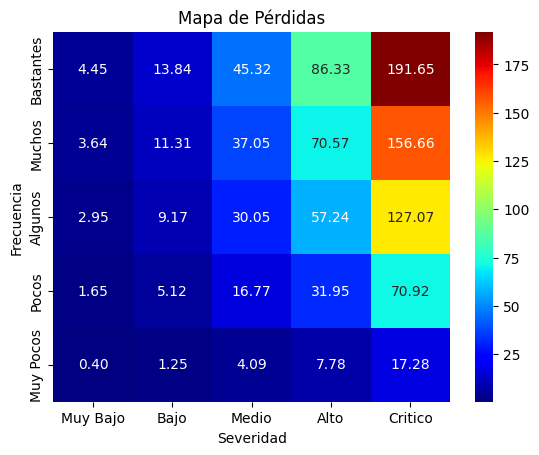

Los cluster para la frecuencia son:
['Muy Pocos', 'Pocos', 'Algunos', 'Muchos', 'Bastantes']
[[ 1.07267262  4.40324251  7.88916867  9.72687543 11.89905183]]
Los cluster para la severidad son:
['Muy Bajo', 'Bajo', 'Medio', 'Alto', 'Critico']
[[ 0.37394726  1.16281852  3.80911117  7.25507449 16.10639724]]


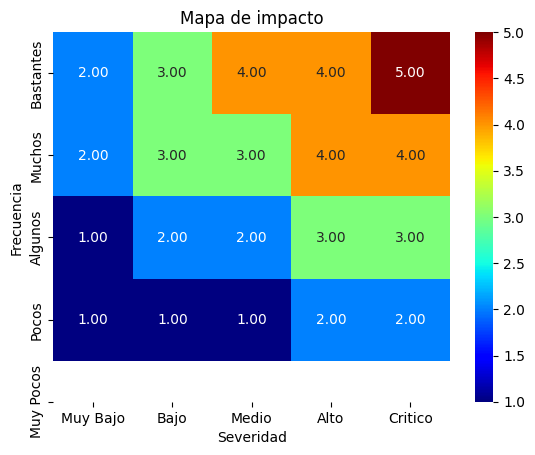

,Frecuencia,ClusterFrecuencia,Severidad,ClusterSeveridad,Impacto
0,1,0.0,0.5374,0.0,0.5374
1,4,1.0,1.1978,1.0,4.7912
2,5,1.0,0.4269,0.0,2.1345
3,6,1.0,1.0814,1.0,6.4884
4,7,2.0,1.2105,1.0,8.4735
...,...,...,...,...,...
696,1,0.0,0.5747,0.0,0.5747
697,6,1.0,0.7209,0.0,4.3254
698,10,3.0,0.3628,0.0,3.628
699,4,1.0,0.2715,0.0,1.086


In [3]:
def KMedoids(X):

  #Se configura el modelo K-Medoids
  XC=np.zeros((5,1))
  XC[:,0]=np.sort(np.random.uniform(low=np.min(X), high=np.max(X), size=5))

  for k in range(len(X)):
      nff=np.argmin(np.abs(XC[:,0]-X[k]))
      XC[nff,0]=(XC[nff,0]+X[k])/2

  XC=np.sort(XC)

  #Se procede con la configuración de la base de xcada cluster
  sigma=np.zeros((5,1))

  for k in range(5):
      sigma[k,0]=np.sum(np.abs(XC[:,]-XC[k,]))/4


  return XC,sigma

nxl='/content/drive/MyDrive/Colab Notebooks/Integracion y prospectiva /5. FallasTecnológicas.xlsx'
XDB=pd.read_excel(nxl)
XDB.head()

#Modelamos la variable de Frecuencia - KMedoids = numero de contenedores que se quedan en tierra.
np.random.seed(42)
XCf=np.array(XDB.iloc[1:,3]) # Start from the second row to skip header
X=XCf
XCf,sigmaf=KMedoids(X)
lbf=['Muy Pocos','Pocos','Algunos','Muchos','Bastantes']

#Modelamos la variable de Severidad = lo costoso que sale cada contenedor.
XCs=np.array(XDB.iloc[1:,4]) # Start from the second row to skip header
X=XCs
XCs,sigmas=KMedoids(X)
lbs=['Muy Bajo','Bajo','Medio','Alto','Critico']

#Modelamos el mapa de pérdida
MP=np.outer(XCf,XCs)
MPo=MP[::-1,:]  #Quedaron ordenados
lbfo=lbf[::-1]  #Labels ordenados

plt.figure()
sns.heatmap(MPo,annot=True,cmap='jet',fmt='.2f')
plt.xlabel('Severidad')
plt.xticks(np.arange(len(lbs))+0.5,lbs)
plt.ylabel('Frecuencia')
plt.yticks(np.arange(len(lbfo))+0.5,lbfo)
plt.title('Mapa de Pérdidas')
plt.show()

print('Los cluster para la frecuencia son:')
print(lbf)
print(XCf.transpose())
print('Los cluster para la severidad son:')
print(lbs)
print(XCs.transpose())

#matriz de  impacto -cuales cuadritos tienen un mayor impacto para las finanzas de la organizacion
#donde se tiene que tener un mayor enfasis en la gestion de los riesgos
MI=np.array(([1,1,1,2,2],
     [1,2,2,3,3],
     [2,3,3,4,4],
     [2,3,4,4,5]))
MIo=MI[::-1,:]
plt.figure()
sns.heatmap(MIo,annot=True,cmap='jet',fmt='.2f')
plt.xlabel('Severidad')
plt.xticks(np.arange(len(lbs))+0.5,lbs)
plt.ylabel('Frecuencia')
plt.yticks(np.arange(len(lbfo))+0.5,lbfo)
plt.title('Mapa de impacto')
plt.show()
#clasificacion de datos por cluster de frecuencia y severidad
Xf=np.array(XDB.iloc[1:,3])  #Frecuencia - Start from the second row to skip header
Xs=np.array(XDB.iloc[1:,4])  #Severidad - Start from the second row to skip header
nCf=np.zeros((len(Xf),1))
nCs=np.zeros((len(Xs),1))
for k in range(len(Xf)):
  nCf[k]=np.argmin(np.abs(XCf-Xf[k]))
  nCs[k]=np.argmin(np.abs(XCs-Xs[k]))
np.column_stack((Xf,nCf,Xs,nCs,Xf*Xs))
df=pd.DataFrame(np.column_stack((Xf,nCf,Xs,nCs,Xf*Xs)))
df.columns = ["Frecuencia","ClusterFrecuencia","Severidad","ClusterSeveridad","Impacto"]
display(df)
df.to_excel('ClustersAnalysis.xlsx')

# **3. Resultado de donde se encuentran las celdas 2 y 3.**

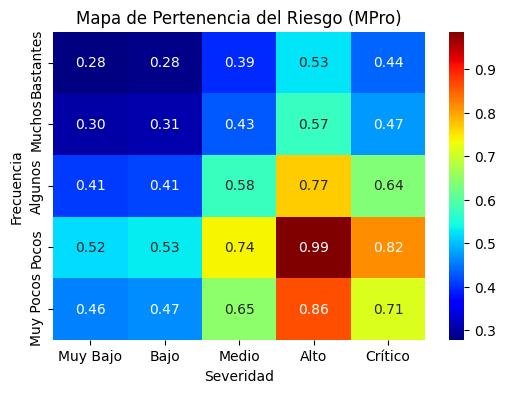

In [4]:
lbf = ['Muy Pocos','Pocos','Algunos','Muchos','Bastantes']
lbs = ['Muy Bajo','Bajo','Medio','Alto','Crítico']

# -----------------------------
# 1) Valores de frecuencia y severidad a evaluar
# (puedes cambiarlos según tu caso)
Xff = 5   # valor de frecuencia (ejemplo)
Xss = 8   # valor de severidad (ejemplo)

# -----------------------------
# 2) Cálculo de las funciones de pertenencia
VPf = np.exp(-0.5 * ((XCf - Xff) / sigmaf)**2)
VPs = np.exp(-0.5 * ((XCs - Xss) / sigmas)**2)

# Normalizamos para que sumen 1
VPf = VPf
VPs = VPs

# -----------------------------
# 3) Construcción de la matriz de pertenencia del riesgo
MPr = np.outer(VPf, VPs)     # Producto externo entre frecuencia y severidad
MPro = MPr[::-1, :]          # Se invierte el orden de filas para visualización

# -----------------------------
# 4) Visualización con mapa de calor
plt.figure(figsize=(6,4))
sns.heatmap(MPro, annot=True, cmap='jet', fmt='.2f')
plt.xlabel('Severidad'); plt.xticks(np.arange(len(lbs)) + 0.5, lbs)
plt.ylabel('Frecuencia'); plt.yticks(np.arange(len(lbf)) + 0.5, lbf[::-1])
plt.title('Mapa de Pertenencia del Riesgo (MPro)')
plt.show()

== Celda (fila,col) visual (2,3) ==
Fila original (clúster frecuencia): 2  |  Col original (clúster severidad): 3
N° de observaciones en la celda (2,3): 8
Índices de registros: [202, 228, 298, 329, 405, 410, 627, 631]
Pérdidas (Xf*Xs) en la celda (2,3):
[78.8669 50.6212 83.656  74.3883 51.6915 79.0744 47.3832 48.2512]


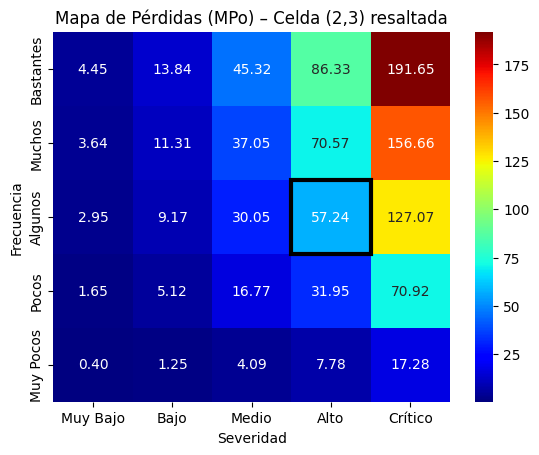

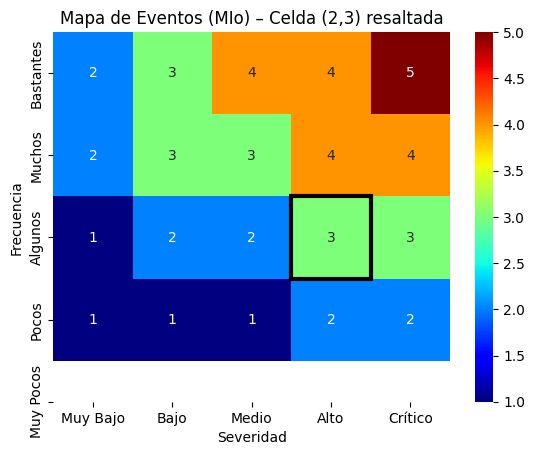

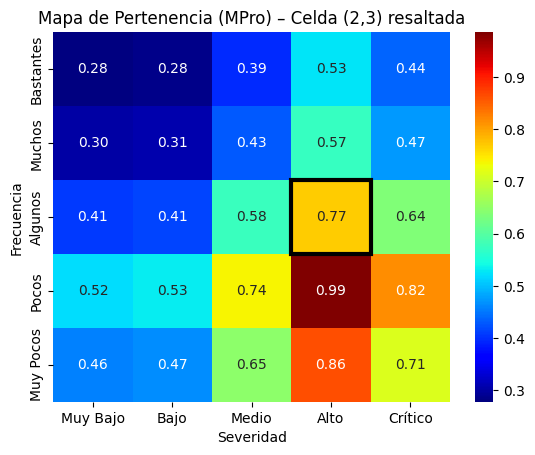

In [9]:
from matplotlib.patches import Rectangle

nCf = np.argmin(np.abs(XCf.T - Xf.reshape(-1,1)), axis=1)  # frecuencia (0..4, en orden original)
nCs = np.argmin(np.abs(XCs.T - Xs.reshape(-1,1)), axis=1)  # severidad (0..4)


fila_visual = 2
col_visual  = 3

fila_original = 4 - fila_visual
col_original  = col_visual

mask_23 = (nCf == fila_original) & (nCs == col_original)
idx_23  = np.where(mask_23)[0]

# pérdidas (impacto) para esas observaciones (puedes usar Xf*Xs u otra métrica)
perdidas_23 = Xf[mask_23] * Xs[mask_23]

print("== Celda (fila,col) visual (2,3) ==")
print(f"Fila original (clúster frecuencia): {fila_original}  |  Col original (clúster severidad): {col_original}")
print(f"N° de observaciones en la celda (2,3): {len(idx_23)}")
print("Índices de registros:", idx_23.tolist())
print("Pérdidas (Xf*Xs) en la celda (2,3):")
print(perdidas_23)

# -----------------------------
# 8) RESALTAR GRÁFICAMENTE LA CELDA (2,3) EN LOS HEATMAPS
# -----------------------------
def highlight_cell(ax, row_vis, col_vis, edgecolor='white', lw=2.5):
    # heatmap usa coordenadas [col, row] con esquinas en enteros
    rect = Rectangle((col_vis, row_vis), 1, 1, fill=False, edgecolor=edgecolor, linewidth=lw)
    ax.add_patch(rect)

# MPo resaltado
plt.figure()
ax = sns.heatmap(MPo, annot=True, cmap='jet', fmt='.2f')
plt.xlabel('Severidad'); plt.xticks(np.arange(5)+0.5, lbs)
plt.ylabel('Frecuencia'); plt.yticks(np.arange(5)+0.5, lbfo)
plt.title('Mapa de Pérdidas (MPo) – Celda (2,3) resaltada')
highlight_cell(ax, fila_visual, col_visual, edgecolor='black', lw=3)
plt.show()

# MIo resaltado
plt.figure()
ax = sns.heatmap(MIo, annot=True, cmap='jet', fmt='.0f')
plt.xlabel('Severidad'); plt.xticks(np.arange(5)+0.5, lbs)
plt.ylabel('Frecuencia'); plt.yticks(np.arange(5)+0.5, lbfo)
plt.title('Mapa de Eventos (MIo) – Celda (2,3) resaltada')
highlight_cell(ax, fila_visual, col_visual, edgecolor='black', lw=3)
plt.show()

# MPro resaltado
plt.figure()
ax = sns.heatmap(MPro, annot=True, cmap='jet', fmt='.2f')
plt.xlabel('Severidad'); plt.xticks(np.arange(5)+0.5, lbs)
plt.ylabel('Frecuencia'); plt.yticks(np.arange(5)+0.5, lbfo)
plt.title('Mapa de Pertenencia (MPro) – Celda (2,3) resaltada')
highlight_cell(ax, fila_visual, col_visual, edgecolor='black', lw=3)
plt.show()

# **4. Distribucion agregada de las perdidas.**

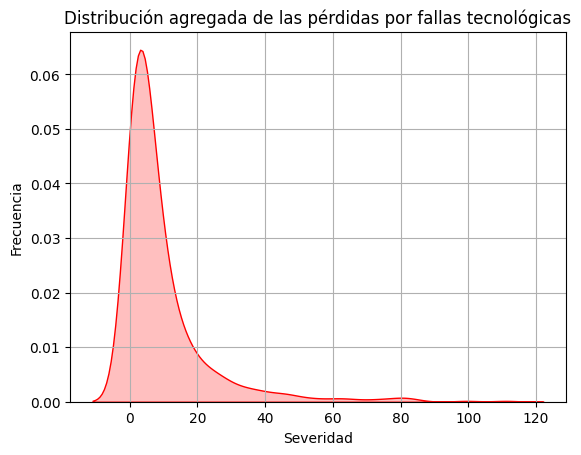

El costo de la póliza de aseguramiento contra fallas tecnológicas es:
102902.1000000008


,Media,Varianza,Asimetría,OpVar,NPE,NPNE,NPC
0,9.451113,13.707472,3.34836,102.9021,502.0,198.0,1.0


In [8]:
lda_df = pd.DataFrame({'Xf': Xf, 'Xs': Xs}).dropna()

Xf = lda_df['Xf'].values.astype(float)
Xs = lda_df['Xs'].values.astype(float)

LDA = Xf * Xs                  # Pérdida agregada

plt.figure()
sns.kdeplot(LDA, fill=True, color='red')
plt.xlabel('Severidad')
plt.ylabel('Frecuencia')
plt.title('Distribución agregada de las pérdidas por fallas tecnológicas')
plt.grid()
plt.show()

# -------------------------------------------------
# Cálculo de los parámetros del riesgo
# -------------------------------------------------
pr = []  # vector de resultados

# Parámetros descriptivos
pr.append(np.mean(LDA))      # Media de pérdidas
pr.append(np.std(LDA))       # Desviación (etiquetada como “Varianza”)
pr.append(skew(LDA))         # Asimetría

# Pérdidas esperadas (por debajo de la media)
NPE = len(LDA[LDA < np.mean(LDA)])

# Costo máximo esperado (OpVar al 99.9%)
OpVar = np.percentile(LDA, 99.9)
pr.append(OpVar)

# Mostrar valor estimado de la póliza
print("El costo de la póliza de aseguramiento contra fallas tecnológicas es:")
print(OpVar * 1000)

# Pérdidas críticas y no esperadas
NPC = len(LDA[LDA > OpVar])                # mayores al OpVar
NPNE = len(LDA) - NPE - NPC                # intermedias (no esperadas)

# Agregar al vector
pr.append(NPE)
pr.append(NPNE)
pr.append(NPC)

# -------------------------------------------------
# Crear DataFrame con los resultados
# -------------------------------------------------
pr = np.array(pr).reshape(1, 7)
df = pd.DataFrame(pr, columns=["Media", "Varianza", "Asimetría", "OpVar", "NPE", "NPNE", "NPC"])

# Mostrar resultados finales
display(df)

# **Analisis ejecutivo**

El análisis realizado sobre la base de datos Fallas Tecnológicas permitió dar respuesta al enfoque orientado a estimar una póliza de aseguramiento frente a contingencias tecnológicas.

En este estudio, la frecuencia representa el número de fallas tecnológicas registradas, mientras que la severidad refleja el impacto económico de cada evento, expresado en dólares. La poliza contra fallas tecnologicas asciende a aproximadamente 102,902 USD, una cifra que evidencia el peso real de estas contingencias.

Entre los hallazgos más relevantes se destacan los siguientes:

* En el Mapa de Pertenencia (MPro), se observa un valor de 0.77 en la celda (2,3). Este indicador sugiere una relación de nivel medio a alto entre la ocurrencia de fallas y sus consecuencias económicas, lo que apunta a una consistencia moderada en la aparición de eventos significativos.

* De forma complementaria, el Mapa de Pérdidas (MPo) reporta una pérdida promedio de 57.24 unidades, mientras que el Mapa de Eventos (Mlo) registra tres incidentes en la misma celda. Estos resultados, analizados en conjunto, confirman que el modelo logra representar de manera coherente y realista el comportamiento del riesgo tecnológico.

Este modelo no solo permite cuantificar el riesgo tecnológico, sino que también ofrece a la empresa una mirada estratégica sobre su distribución e impacto. Ayudondola a  identificar zonas críticas y estimar el costo potencial de las fallas.Orientandola a fortalecer los sistemas, anticipar contingencias y diseñar mecanismos de protección más eficaces frente a escenarios inciertos.